## Data Exploration

โดยชุดข้อมูลนี้ต้องการให้เราทำนายว่าผู้ใช้งาน credit_card จะมีแนวโน้มว่าจะยกเลิก หรือ จะใช้งาน credit_card ต่อไปโดยวิเคราะห์จาก feature ที่มี
จากข้อมูลที่ได้มามี feature ทั้งหมด 23 feature และมี sample ทั้งหมด 10127 คน จากคำแนะนำของชุดข้อมูลได้ทำการลบ 2 feature สุดท้ายออก
แยก feature Attrition_Flag ออกมาเก็บในตัวแปล df_y เหลือชุดข้อมูลในการวิเคราะห์ทั้งหมด 20 feature

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

df_full = pd.read_csv('diabetes.csv',sep=',')
df_full.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
df_y = df_full["Outcome"]
# df.head()
df = df_full.drop(["Outcome"],axis = 1)
print(df.shape)
df.head()

(768, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


โดยชุดข้อมูลของคนที่ใช้ Credit card อยู่ในปัจจุบันมีจำนวน 768 คน และ ยกเลิก Credit card มีจำนวน 1627 คน<br>
จากการ check ข้อมูลไม่มี missing value ในชุดข้อมูล

In [115]:
print(df_y.value_counts())
print("")
print(df.isnull().sum())
print(df.shape)

0    500
1    268
Name: Outcome, dtype: int64

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
(768, 8)


## Data Preprocessing

### Feature Selection โดยดูจากความสัมพันธ์


Pairplot Data

In [116]:
# sns.pairplot(df_full,hue="Outcome")
Image(url="pic/Pairplot_df_full.png", width=1000, height=1000)   

Plot heatmap numeric

<AxesSubplot:>

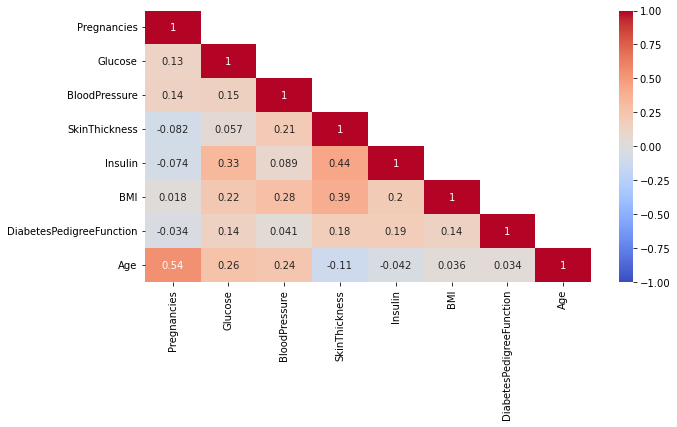

In [117]:
corr = df.corr()
mask = np.array(corr)
# print(corr)
mask[np.tril_indices_from(mask)] = False     
fig,ax = plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corr,mask= mask,vmax =1,vmin = -1,annot= True,cmap= 'coolwarm')

## MinMaxScaler df_MM

In [118]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder, QuantileTransformer
scaler = MinMaxScaler()
MinMax = scaler.fit_transform(df)
# print(X)
df_MM = pd.DataFrame(MinMax,columns= list(df.columns))
df_MM.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


## Train_Test_Split df_MM

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_MM,df_y,test_size = 0.5,random_state = 25)
print(y_train.value_counts())

print("X_train : " +str(X_train.shape))

0    247
1    137
Name: Outcome, dtype: int64
X_train : (384, 8)


## Model Building & Model Training df_MM

In [120]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(criterion='entropy',)
model_DecisionTree 


DecisionTreeClassifier(criterion='entropy')

In [121]:
# train model
model_DecisionTree.fit(X_train, y_train)
# predict model train
y_pred = model_DecisionTree.predict(X_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))
# predict model test
y_pred = model_DecisionTree.predict(X_test)
# predict model train
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       137

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384

Confusion matrix 
[[247   0]
 [  0 137]]
Classification report 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       253
           1       0.52      0.51      0.52       131

    accuracy                           0.67       384
   macro avg       0.63      0.63      0.63       384
weighted avg       0.67      0.67      0.67       384

Confusion matrix 
[[191  62]
 [ 64  67]]


## Train_Test_Split df

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,df_y,test_size = 0.5,random_state = 25)
print(y_train.value_counts())

print("X_train : " +str(X_train.shape))

0    247
1    137
Name: Outcome, dtype: int64
X_train : (384, 8)


## Model Building & Model Training df

In [123]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree = DecisionTreeClassifier(criterion='entropy',)
model_DecisionTree 


DecisionTreeClassifier(criterion='entropy')

In [124]:
# train model
model_DecisionTree.fit(X_train, y_train)
# predict model train
y_pred = model_DecisionTree.predict(X_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))
# predict model test
y_pred = model_DecisionTree.predict(X_test)
# predict model train
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       137

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384

Confusion matrix 
[[247   0]
 [  0 137]]
Classification report 
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       253
           1       0.57      0.56      0.56       131

    accuracy                           0.70       384
   macro avg       0.67      0.67      0.67       384
weighted avg       0.70      0.70      0.70       384

Confusion matrix 
[[197  56]
 [ 58  73]]
